### Machine Learning Project3

Name : Priyanka Nigade <br>


In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# calculate cross validation score and under the roc curve socring
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [368]:
# Loading Dataset into Dataframe

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
df.shape

(299, 13)

In [369]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

**Attribute Information: <br>**

Thirteen (13) clinical features:<br>

<li> age: age of the patient (years)
<li> anaemia: decrease of red blood cells or hemoglobin (boolean)
<li> high blood pressure: if the patient has hypertension (boolean)
<li> creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
<li> diabetes: if the patient has diabetes (boolean)
<li> ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
<li> platelets: platelets in the blood (kiloplatelets/mL)
<li> sex: woman or man (binary)
<li> serum creatinine: level of serum creatinine in the blood (mg/dL)
<li> serum sodium: level of serum sodium in the blood (mEq/L)
<li> smoking: if the patient smokes or not (boolean)
<li> time: follow-up period (days)
<li> [target] death event: if the patient deceased during the follow-up period (boolean)

In [370]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [372]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(df.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**<li> No Null/Missing values**

In [373]:
df.duplicated().sum()


0

<li> No Duplicate values 

1) Perform Explanatory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one.

Text(0.5, 1.0, 'Patient deceased')

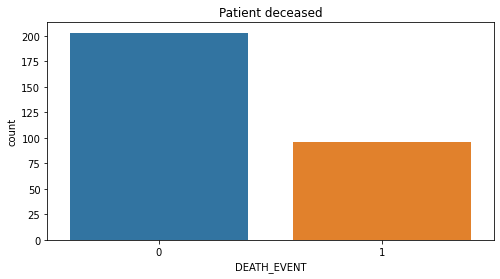

In [209]:
#Check how many customers open Deposit : target ='yes'
plt.figure(figsize=(8,4))
sns.countplot(x='DEATH_EVENT',data=df)
plt.title('Patient deceased')

**Dataset is imbalanced**

Text(0.5, 1.0, 'Anaemia vs DEATH_EVENT')

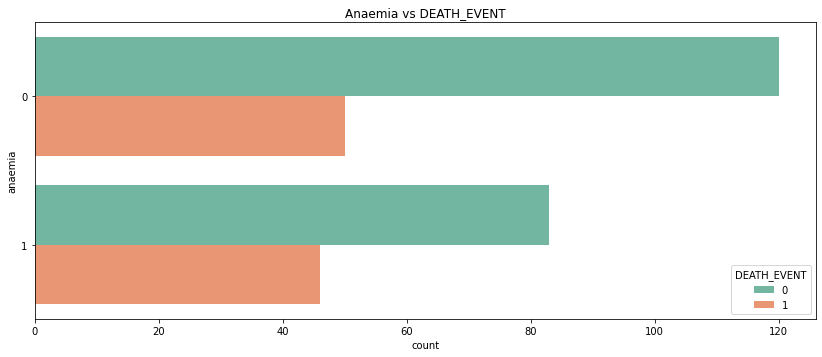

In [374]:
#anaemia vs Target
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='anaemia',data=df,hue='DEATH_EVENT',palette='Set2')
plt.title('Anaemia vs DEATH_EVENT')

Text(0.5, 1.0, 'Diabetes vs DEATH EVENT')

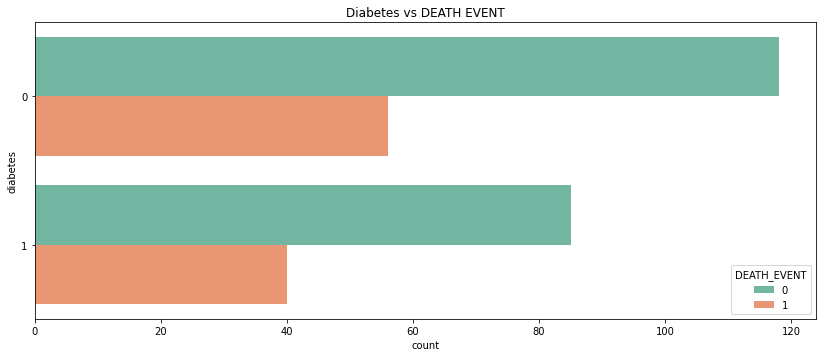

In [375]:
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='diabetes',data=df,hue='DEATH_EVENT',palette='Set2')
plt.title('Diabetes vs DEATH EVENT')

Text(0.5, 1.0, 'High blood pressure vs DEATH EVENT')

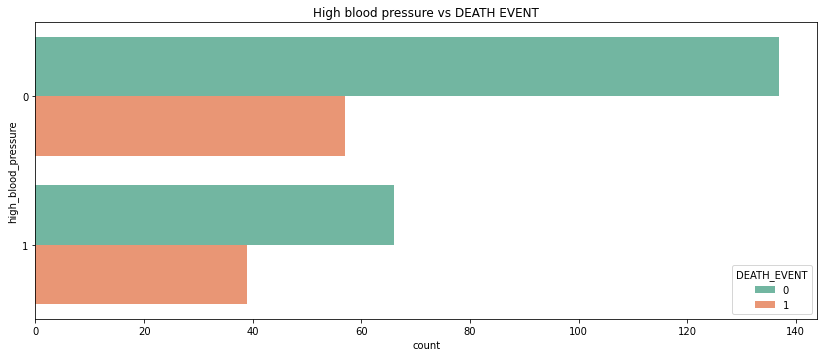

In [376]:
plt.figure(figsize=(14,12))

plt.subplot(211)
sns.countplot(y='high_blood_pressure',data=df,hue='DEATH_EVENT',palette='Set2')
plt.title('High blood pressure vs DEATH EVENT')

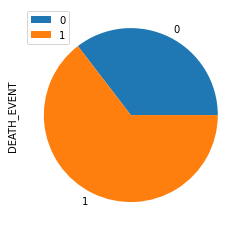

In [377]:
# Plotting the pie chart for above dataframe
df.groupby(['sex']).sum().plot(kind='pie', y='DEATH_EVENT')

Most heart disease patients are Male

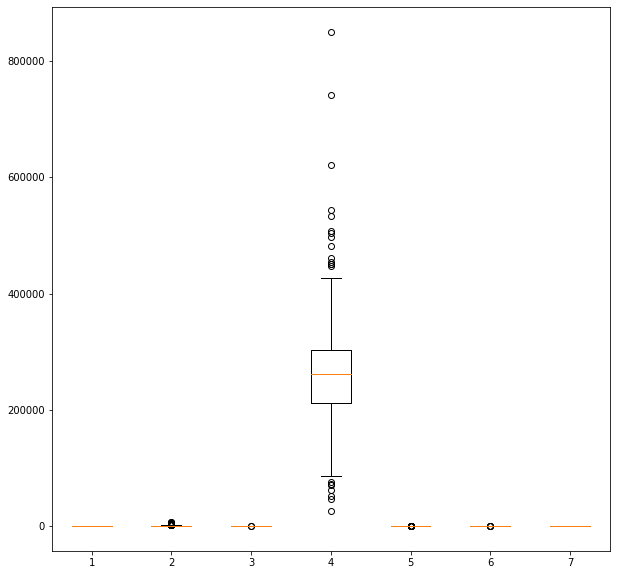

In [378]:
#Method - Boxplots
plt.figure(figsize = (10,10))
plt.boxplot ((df['age'], df['creatinine_phosphokinase'], df['ejection_fraction'], df['platelets'], df['serum_creatinine'],  df['serum_sodium'],  df['time']))
plt.show()

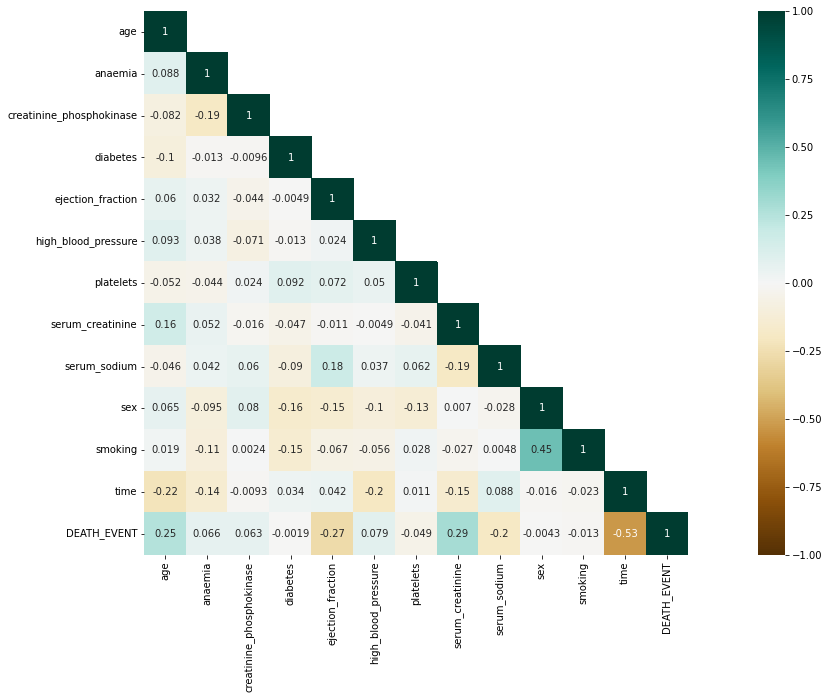

In [379]:
# Visualization of correlations (heatmap)
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

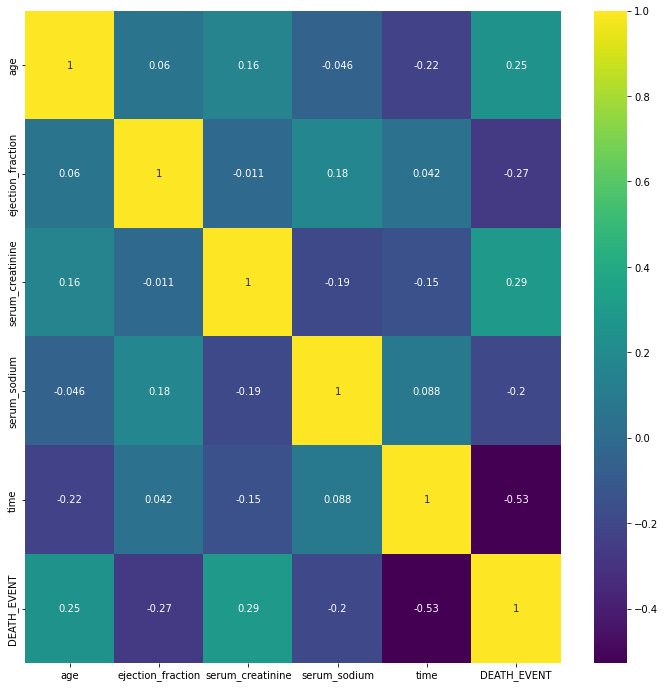

In [380]:
# Plot the coorelation matrix with only highly correlated features

correlation = df.corr(method='pearson', min_periods=1)
columns = correlation[abs(correlation['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

column_list = columns.index
column_list
high_corr_df = pd.DataFrame(df, columns = column_list)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(high_corr_df.corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

**Highly correlate features :** Age,  ejection_fraction, serum_creatinine, serum_sodium, time

2) Apply Machine Learning Modeling on the dataset using all the above 4 algorithms. Tune (hyper-parameter tuning) each model by calling the GridSearchCV method. Indicate which combination of Hyperparameters produces the best result.
Note: Use accuracy and AUC-ROC metrics when evaluating your models.

**Data Preparation**

In [381]:
heart_faliure_data = df.copy()

In [382]:
# apply normalization techniques
for column in heart_faliure_data.columns:
  if column != 'DEATH_EVENT':
    heart_faliure_data[column] = (heart_faliure_data[column] - heart_faliure_data[column].min()) / (heart_faliure_data[column].max() - heart_faliure_data[column].min())    
  
# view normalized data
heart_faliure_data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.071319       0.0           0.090909   
1    0.272727      0.0                  1.000000       0.0           0.363636   
2    0.454545      0.0                  0.015693       0.0           0.090909   
3    0.181818      1.0                  0.011227       0.0           0.090909   
4    0.454545      1.0                  0.017479       1.0           0.090909   
..        ...      ...                       ...       ...                ...   
294  0.400000      0.0                  0.004848       1.0           0.363636   
295  0.272727      0.0                  0.229268       0.0           0.363636   
296  0.090909      0.0                  0.259888       1.0           0.696970   
297  0.090909      0.0                  0.304925       0.0           0.363636   
298  0.181818      0.0                  0.022072       0.0           0.469697   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1.0   0.290823          0.157303      0.485714  1.0   
1                    0.0   0.288833          0.067416      0.657143  1.0   
2                    0.0   0.165960          0.089888      0.457143  1.0   
3                    0.0   0.224148          0.157303      0.685714  1.0   
4                    0.0   0.365984          0.247191      0.085714  0.0   
..                   ...        ...               ...           ...  ...   
294                  1.0   0.157474          0.067416      0.857143  1.0   
295                  0.0   0.296884          0.078652      0.742857  0.0   
296                  0.0   0.869075          0.033708      0.714286  0.0   
297                  0.0   0.139290          0.101124      0.771429  1.0   
298                  0.0   0.448418          0.123596      0.657143  1.0   

     smoking      time  DEATH_EVENT  
0        0.0  0.000000            1  
1        0.0  0.007117            1  
2        1.0  0.010676            1  
3        0.0  0.010676            1  
4        0.0  0.014235            1  
..       ...       ...          ...  
294      1.0  0.946619            0  
295      0.0  0.950178            0  
296      0.0  0.975089            0  
297      1.0  0.982206            0  
298      1.0  1.000000            0  

[299 rows x 13 columns]

In [383]:

# Dividing the dataset in train (70%) and test (30%)
label = heart_faliure_data['DEATH_EVENT']
features_col = heart_faliure_data.drop(['DEATH_EVENT'], axis = 1)


In [384]:

X_train, X_test, y_train, y_test = train_test_split(features_col, label, test_size = 0.3, random_state = 40)


Synthetic Minority Oversampling Technique (SMOTE)

To avoid this imbalance of Dataset and create an un-biased model, the dataset should be balanced where we need to generate more  examples of the minority class. We will apply the Synthetic Minority Oversampling Technique (SMOTE) algorithm on the training data such that more examples of the death events are generated and we have a balanced dataset.

In [222]:
# # Implement SMOTE

# from imblearn.over_sampling import SMOTE
# sampling = SMOTE(random_state = 100)
# X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())
    
# # Shuffle the data
# perms = np.random.permutation(X_train_resampled.shape[0])
# X_train_resampled = X_train_resampled[perms]
# y_train_resampled = y_train_resampled[perms]

# X_train_resampled = pd.DataFrame(data = X_train_resampled)
# y_train_resampled = pd.DataFrame(data = y_train_resampled)

# print(X_train_resampled.shape)
# print(y_train_resampled.shape)

In [385]:
# created function to get ROC and AUC

def plot_roc(y_test, y_pred, y_pred_proba):

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
    
    print("\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    
    
    print("\n=================== classification report ===================")
    print(classification_report(y_test, y_pred))

    print("\n===== Plot Receiver Operating Characteristic(ROC) =====")
    plt.plot(fpr,tpr,label="Death Event, area under curve="+str(auc_score))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate - Specificity ")
    plt.ylabel("True Positive Rate - Sensitivity")
    plt.title("ROC for predicting Death Event")
    plt.show()
    
    print("\n===== Area under Curve(AUC) =====")
    print('AUC:', auc_score)

In [386]:
score_df = pd.DataFrame(columns = ['Classifier', 'Accuracy'])

**Logistic Regression (LR) - without hyper parameter**

In [387]:
# instantiate the model (using the default parameters)
#logreg = LogisticRegression(max_iter = 400)

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict the X_test using Logistic Regression
y_pred=logreg.predict(X_test)



===== confusion matrix =====
[[58  1]
 [11 20]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        59
           1       0.95      0.65      0.77        31

    accuracy                           0.87        90
   macro avg       0.90      0.81      0.84        90
weighted avg       0.88      0.87      0.86        90


===== Plot Receiver Operating Characteristic(ROC) =====


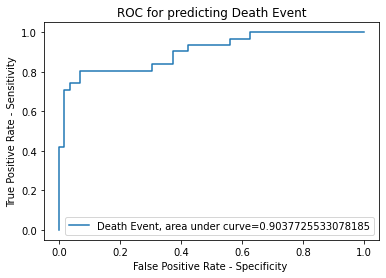


===== Area under Curve(AUC) =====
AUC: 0.9037725533078185


In [388]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)

In [389]:
score_df = score_df.append({'Classifier' : 'LR', 'Accuracy' : metrics.accuracy_score(y_test, y_pred)}, 
                ignore_index = True)



**Logistic Regression (LR) - with hyper parameter**

In [390]:
# parameter grid
import warnings
warnings.filterwarnings('ignore')
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7), #penality strength
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [391]:

logreg_param = GridSearchCV(logreg,           # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10) 

In [392]:

logreg_param.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [393]:
print("Tuned Hyperparameters :", logreg_param.best_params_)
print("Accuracy :",logreg_param.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8369047619047617



===== confusion matrix =====
[[58  1]
 [11 20]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        59
           1       0.95      0.65      0.77        31

    accuracy                           0.87        90
   macro avg       0.90      0.81      0.84        90
weighted avg       0.88      0.87      0.86        90


===== Plot Receiver Operating Characteristic(ROC) =====


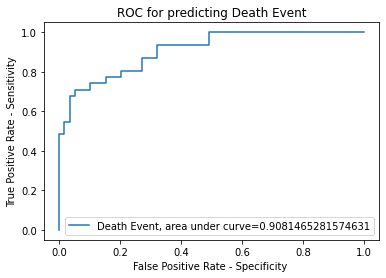


===== Area under Curve(AUC) =====
AUC: 0.9081465281574631


In [394]:
y_pred_proba = logreg_param.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)

In [395]:
score_df = score_df.append({'Classifier' : 'Parameterized LR', 'Accuracy' : logreg_param.best_score_}, 
                ignore_index = True)

**Decision Tree - without Hyper parameter tuning**

In [396]:
# Building Decision Tree model 
decisionTree = DecisionTreeClassifier()

# fit the model with data
decisionTree.fit(X_train, y_train)

# Predict the Xtest data with Decision Tree model 
y_pred = decisionTree.predict(X_test)


===== confusion matrix =====
[[50  9]
 [ 9 22]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        59
           1       0.71      0.71      0.71        31

    accuracy                           0.80        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90


===== Plot Receiver Operating Characteristic(ROC) =====


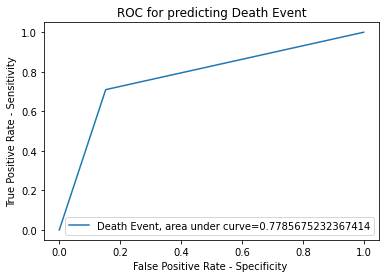


===== Area under Curve(AUC) =====
AUC: 0.7785675232367414


In [397]:
y_pred_proba = decisionTree.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)

In [398]:
score_df = score_df.append({'Classifier' : 'DT', 'Accuracy' : metrics.accuracy_score(y_test, y_pred)}, 
                ignore_index = True)

**Decision Tree - with hyper param tuning**

In [399]:
# Decision Tree - Parameter Grid
parameters = { "criterion": ["gini", "entropy"],
              "max_depth": range(1, 10),
              "min_samples_split": range(1, 10),
              "min_samples_leaf": range(1, 5),
             }


In [400]:
dt_param = GridSearchCV(decisionTree,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10) 
dt_param.fit(X_train,y_train)
print("Tuned Hyperparameters :", dt_param.best_params_)
print("Accuracy :",dt_param.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy : 0.8278571428571428



===== confusion matrix =====
[[50  9]
 [ 9 22]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        59
           1       0.71      0.71      0.71        31

    accuracy                           0.80        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90


===== Plot Receiver Operating Characteristic(ROC) =====


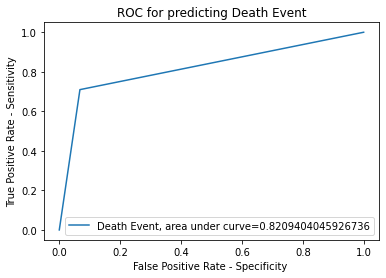


===== Area under Curve(AUC) =====
AUC: 0.8209404045926736


In [401]:
y_pred_proba = dt_param.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)

In [402]:
score_df = score_df.append({'Classifier' : 'Parameterized DT', 'Accuracy' : dt_param.best_score_}, 
                ignore_index = True)

**Random Forest - without hyper parameter**

In [403]:
# Building Random Forest model 
random_forest = RandomForestClassifier()

# fit the model with data
random_forest.fit(X_train, y_train)

# Predict the Xtest data with random_forest  model 
y_pred = random_forest.predict(X_test)


===== confusion matrix =====
[[52  7]
 [ 5 26]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.79      0.84      0.81        31

    accuracy                           0.87        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.87      0.87      0.87        90


===== Plot Receiver Operating Characteristic(ROC) =====


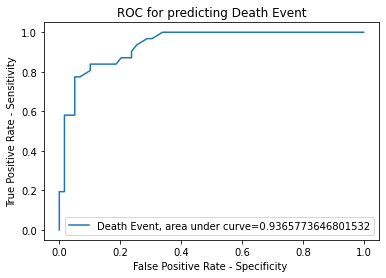


===== Area under Curve(AUC) =====
AUC: 0.9365773646801532


In [404]:
y_pred_proba = random_forest.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)

In [405]:
score_df = score_df.append({'Classifier' : 'RF', 'Accuracy' : metrics.accuracy_score(y_test, y_pred)}, 
                ignore_index = True)

**Random Forest (RF) - with hyper parameter**

In [406]:
# Random Forest - Parameter Grid
rf_parameters = { 
    'n_estimators': [100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [407]:
rf_grid_param = GridSearchCV(random_forest,      # model
                   param_grid = rf_parameters,   # hyperparameters
                   scoring='accuracy',           # metric for scoring
                   cv=10) 
rf_grid_param.fit(X_train,y_train)
print("Tuned Hyperparameters :", rf_grid_param.best_params_)
print("Accuracy After Finetuning :",rf_grid_param.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Accuracy After Finetuning : 0.8614285714285715



===== confusion matrix =====
[[52  7]
 [ 5 26]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.79      0.84      0.81        31

    accuracy                           0.87        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.87      0.87      0.87        90


===== Plot Receiver Operating Characteristic(ROC) =====


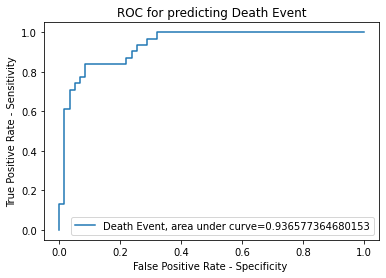


===== Area under Curve(AUC) =====
AUC: 0.936577364680153


In [408]:
y_pred_proba = rf_grid_param.predict_proba(X_test)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)

In [409]:
score_df = score_df.append({'Classifier' : 'Parameterized RF', 'Accuracy' : rf_grid_param.best_score_}, 
                ignore_index = True)

**XGBoost (XGB) - without parameter**

In [410]:
# Building XGBoost model 
#The Extreme gradient boosting decision tree algorithm.
xgb_model = XGBClassifier()

# X_values = X_train.values
# y_values = y_train.values

# fit the model with data
xgb_model.fit(X_train.values, y_train.values)

# Predict the Xtest data with Extreme gradient boosting  model 
y_pred = xgb_model.predict(X_test.values)

In [411]:
#pip install preprocessing


===== confusion matrix =====
[[50  9]
 [ 6 25]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        59
           1       0.74      0.81      0.77        31

    accuracy                           0.83        90
   macro avg       0.81      0.83      0.82        90
weighted avg       0.84      0.83      0.84        90


===== Plot Receiver Operating Characteristic(ROC) =====


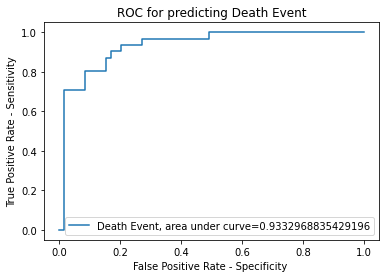


===== Area under Curve(AUC) =====
AUC: 0.9332968835429196


In [412]:
y_pred_proba = xgb_model.predict_proba(X_test.values)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)


In [413]:
score_df = score_df.append({'Classifier' : 'XGBoost', 'Accuracy' : metrics.accuracy_score(y_test, y_pred)}, 
                ignore_index = True)

**XGBoost (XGB) - with Hyper parameter**

In [414]:

param_grid = {
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [6,7,8,9,10,11,12],
    'gamma': [0,1,2,3],
    'scale_pos_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9]
}

In [415]:
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
xgb_grid.fit(X_train.values,y_train.values)

Fitting 3 folds for each of 504 candidates, totalling 1512 fits


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 1, 2, 3],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'scale_pos_weight': [1, 2, 3],
                         'subsample': [0.7, 0.8, 0.9]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [416]:

print("Tuned Hyperparameters :", xgb_grid.best_params_)
print("Accuracy After Finetuning :",xgb_grid.best_score_)

Tuned Hyperparameters : {'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 7, 'scale_pos_weight': 1, 'subsample': 0.7}
Accuracy After Finetuning : 0.8657694962042788



===== confusion matrix =====
[[50  9]
 [ 6 25]]

=================== classification report ===================
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        59
           1       0.74      0.81      0.77        31

    accuracy                           0.83        90
   macro avg       0.81      0.83      0.82        90
weighted avg       0.84      0.83      0.84        90


===== Plot Receiver Operating Characteristic(ROC) =====


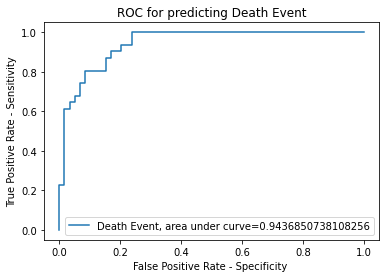


===== Area under Curve(AUC) =====
AUC: 0.9436850738108256


In [417]:
y_pred_proba = xgb_grid.predict_proba(X_test.values)[::,1]
plot_roc(y_test, y_pred, y_pred_proba)


In [418]:
score_df = score_df.append({'Classifier' : 'Parameterized XGBoost', 'Accuracy' : xgb_grid.best_score_}, 
                ignore_index = True)

**Model Evaluation**

In [420]:
score_df.sort_values(by=['Accuracy'], ascending = False)

Classifier  Accuracy
0                     LR  0.866667
4                     RF  0.866667
7  Parameterized XGBoost  0.865769
5       Parameterized RF  0.861429
1       Parameterized LR  0.836905
6                XGBoost  0.833333
3       Parameterized DT  0.827857
2                     DT  0.800000

### Interpretation/Explanation Step
3) Perform Machine Learning Interpretability/Explanability tasks as follows:


3_A)
Use the 'eli5' library to interpret the "white box" model of Logistic Regression. Apply 'eli5' to visualize the weights associated to each feature.
Use 'eli5' to explain specific predictions, pick a row in the test data with negative label and one with positive.

In [421]:
#pip install eli5

In [422]:
import eli5

In [423]:
eli5.show_weights(logreg, feature_names=features_col.columns.tolist())
#<BIAS> as the expected average score output by the model

In [424]:
predicted = logreg.predict(X_test)
print('Predicted')
print(predicted)
print('expected')
y_test


Predicted
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0]
expected


43     0
228    0
18     1
183    1
135    0
      ..
264    0
86     0
5      1
33     0
177    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [425]:
 y_test = y_test.to_list()
# y_test

In [426]:
print(predicted[0])
print(y_test[0])

0
0


In [427]:
print(predicted[3])
print(y_test[3])

0
1


In [428]:
i = 0
X_test.iloc[[i]]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
43  0.581818      0.0                  0.013269       1.0           0.545455   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
43                  1.0   0.233847           0.05618           0.6  1.0   

    smoking      time  
43      0.0  0.103203

In [432]:
eli5.show_prediction(logreg, X_test.iloc[i], feature_names=features_col.columns.tolist(), show_feature_values=True)

In [434]:
j = 3
eli5.show_prediction(logreg, X_test.iloc[j], feature_names=features_col.columns.tolist(), show_feature_values=True)

In [483]:
k = 8
eli5.show_prediction(logreg, X_test.iloc[k], feature_names=features_col.columns.tolist(), show_feature_values=True)

3_B)
Use the 'eli5' library to interpret the "white box" model of Decision Tree. Apply 'eli5' to list the feature importance ordered by the highest value.

In [435]:
eli5.show_weights(decisionTree, feature_names= features_col.columns.tolist(),
             show=["feature_importances"])

In [436]:
from eli5.sklearn import explain_weights_sklearn,explain_decision_tree

explanation = explain_weights_sklearn(decisionTree, feature_names= features_col.columns.tolist())
type(explanation)

eli5.base.Explanation

In [437]:
from eli5.formatters import format_as_dataframe, format_as_dataframes

format_as_dataframe(explanation)

feature    weight
0                       time  0.503394
1          ejection_fraction  0.119508
2           serum_creatinine  0.108272
3               serum_sodium  0.103567
4                  platelets  0.045931
5   creatinine_phosphokinase  0.035767
6                    smoking  0.032749
7                        age  0.030963
8                        sex  0.019848
9        high_blood_pressure  0.000000
10                  diabetes  0.000000
11                   anaemia  0.000000

In [438]:
explain_decision_tree(decisionTree, feature_names=features_col.columns.tolist())

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='time', weight=0.5033943088456057, std=None, value=None), FeatureWeight(feature='ejection_fraction', weight=0.11950790022071774, std=None, value=None), FeatureWeight(feature='serum_creatinine', weight=0.10827228288868017, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=0.10356695156695163, std=None, value=None), FeatureWeight(feature='platelets', weight=0.04593050234670684, std=None, value=None), FeatureWeight(feature='creatinine_phosphokinase', weight=0.03576739144046835, std=None, value=None), FeatureWeight(feature='smoking', weight=0.032749287749287745, std=None, value=None), FeatureWeight(feature='age', weight=0.03096332176019547, std=None, value=None), FeatureWeight(feature='sex', weight=0.019848053181386514, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=0.0, std=None, value=None), FeatureWeight(feature='diabetes', weight=0.0, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[144.0, 65.0], value_ratio=[0.6889952153110048, 0.31100478468899523], impurity=0.4285616171790939, samples=209, sample_ratio=1.0, feature_name='time', feature_id=11, threshold=0.24733096361160278, left=NodeInfo(id=1, is_leaf=False, value=[9.0, 41.0], value_ratio=[0.18, 0.82], impurity=0.2952, samples=50, sample_ratio=0.23923444976076555, feature_name='serum_sodium', feature_id=8, threshold=0.6714285910129547, left=NodeInfo(id=2, is_leaf=True, value=[0.0, 26.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=26, sample_ratio=0.12440191387559808, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=3, is_leaf=False, value=[9.0, 15.0], value_ratio=[0.375, 0.625], impurity=0.46875, samples=24, sample_ratio=0.11483253588516747, feature_name='serum_sodium', feature_id=8, threshold=0.7000000178813934, left=NodeInfo(id=4, is_leaf=False, value=[4.0, 1.0], value_ratio=[0.8, 0.2], impurity=0.31999999999999995, samples=5, sample_ratio=0.023923444976076555, feature_name='platelets', feature_id=6, threshold=0.14232028275728226, left=NodeInfo(id=5, is_leaf=True, value=[0.0, 1.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=1, sample_ratio=0.004784688995215311, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=6, is_leaf=True, value=[4.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=4, sample_ratio=0.019138755980861243, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=7, is_leaf=False, value=[5.0, 14.0], value_ratio=[0.2631578947368421, 0.7368421052631579], impurity=0.38781163434903043, samples=19, sample_ratio=0.09090909090909091, feature_name='ejection_fraction', feature_id=4, threshold=0.20454546064138412, left=NodeInfo(id=8, is_leaf=True, value=[0.0, 6.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=6, sample_ratio=0.028708133971291867, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=9, is_leaf=False, value=[5.0, 8.0], value_ratio=[0.38461538461538464, 0.6153846153846154], impurity=0.47337278106508873, samples=13, sample_ratio=0.06220095693779904, feature_name='time', feature_id=11, threshold=0.1583629921078682, left=NodeInfo(id=10, is_leaf=False, value=[1.0, 7.0], value_ratio=[0.125, 0.875], impurity=0.21875, samples=8, sample_ratio=0.03827751196172249, feature_name='ejection_fraction', feature_id=4, threshold=0.280303031206131, left=NodeInfo(id=11, is_leaf=True, value=[1.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=1, sample_ratio=0.004784688995215311, feature_name=None, feature_id=None


Get an explanation for a given prediction, one positive and one negative. This will calculate the contribution of each feature in the prediction. The explanation for a single prediction is calculated by following the decision path in the tree, and adding up contribution of each feature from each node crossed into the overall probability predicted.

In [439]:
# for positive test sample
eli5.show_prediction(decisionTree, X_test.iloc[i], feature_names=features_col.columns.tolist(), show_feature_values=True)

In [441]:
from eli5.sklearn import explain_prediction
explanation = explain_prediction.explain_prediction_tree_classifier(decisionTree, X_test.iloc[i],
                                                     targets=[0,1], target_names=decisionTree.classes_,
                                                     feature_names= features_col.columns.tolist()
                                                    )

In [442]:

from eli5.formatters import format_as_html
from IPython.display import HTML
HTML(format_as_html(explanation))

In [443]:
# For Negative Test Sample
eli5.show_prediction(decisionTree, X_test.iloc[j], feature_names=features_col.columns.tolist(), show_feature_values=True)


In [444]:
from eli5.sklearn import explain_prediction
explanation = explain_prediction.explain_prediction_tree_classifier(decisionTree, X_test.iloc[j],
                                                     targets=[0,1], target_names=decisionTree.classes_,
                                                     feature_names= features_col.columns.tolist()
                                                    )


In [445]:
from eli5.formatters import format_as_html
from IPython.display import HTML

HTML(format_as_html(explanation))

3_C)
Use LIME to explain both the Random Forest and the XGBoost models.
Create a LIME explainer by using the LimeTabularExplainer method, the main explainer to use for tabular data.
LIME fits a linear model on a local shuffled dataset. Access the coefficients, the intercept
and the R2 of the linear model, for both model interpretability.

 
Note: If R2 is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides

In [281]:
#pip install lime

In [282]:
import lime
from lime import lime_tabular

**LIME to explain Random Forest**

In [448]:
# LIME has one explainer for models
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=random_forest.classes_, verbose=True, mode='classification')


explainer

In [449]:
# Choose the 4th instance and use it to predict the results (positive value)
i = 0
# predict_proba is required as LIME requires class probabilities in case of classification example

exp = explainer.explain_instance(X_test.values[i], random_forest.predict_proba, num_features=12)
exp.show_in_notebook(show_table=True)

Intercept 0.24677029257101055
Prediction_local [0.75760702]
Right: 0.87


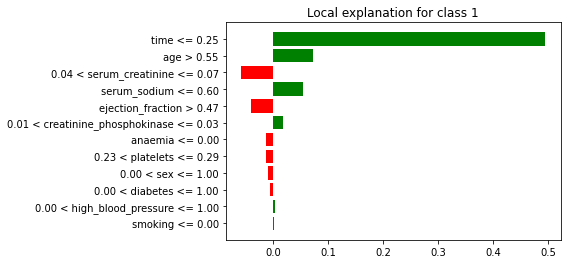

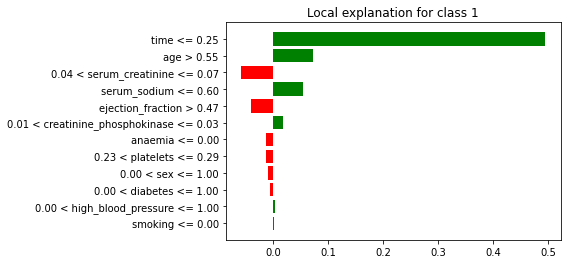

In [450]:
# Display weight graph
exp.as_pyplot_figure()

In [451]:
print(exp.local_exp)
print(exp.intercept)
#R2 score
print(exp.score)

{1: [(11, 0.49480505272188013), (0, 0.07288535358912916), (7, -0.057718786135414826), (8, 0.05464462504965623), (4, -0.03956456619018735), (2, 0.017640031636277045), (1, -0.012326983952983707), (6, -0.011759863295381), (9, -0.00877428247255059), (3, -0.005905028372169051), (5, 0.004239460221312614), (10, 0.0026717181951290032)]}
{1: 0.24677029257101055}
0.6947178915270654


In [452]:
# Choose the 3rd instance and use it to predict the results
j = 3

exp = explainer.explain_instance(X_test.values[j], random_forest.predict_proba, num_features=12)
exp.show_in_notebook(show_table=True)

Intercept 0.38709739224767026
Prediction_local [0.41755206]
Right: 0.54


In [453]:
print(exp.local_exp)
print(exp.intercept)
#R2 score
print(exp.score)

{1: [(7, 0.20020056415129286), (11, -0.14379454941043335), (0, 0.08114974731919884), (4, -0.0629900985352183), (2, -0.04205530727690482), (8, 0.040616146984435754), (9, -0.013524033672409525), (1, -0.013272982970613682), (6, -0.011773320945283118), (10, -0.011700364976010805), (5, 0.007304794713376961), (3, 0.0002940763232903605)]}
{1: 0.38709739224767026}
0.20004349564450208


**LIME to explain XGBoost Model**

In [454]:
# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=xgb_model.get_booster().feature_names,
                                                  class_names=xgb_model.classes_, verbose=True, mode='classification')


explainer

In [458]:
# Choose the 0th instance and use it to predict the results for positive value 
i = 0

# predict_proba is required as LIME requires class probabilities in case of classification example

exp = explainer.explain_instance(X_test.values[i], xgb_model.predict_proba, num_features=12)
exp.show_in_notebook(show_table=True)

Intercept 0.21731228202988773
Prediction_local [0.8217678]
Right: 0.9912464


In [459]:
#R2 score
print(exp.score)

0.6538378634269745


In [456]:
# Choose the 3rd instance and use it to predict the results
j = 3

exp = explainer.explain_instance(X_test.values[j], xgb_model.predict_proba, num_features=12)
exp.show_in_notebook(show_table=True)

Intercept 0.3469411803625982
Prediction_local [0.39563486]
Right: 0.74660844


In [457]:
#R2 score
print(exp.score)

{1: [(7, 0.206505726998065), (2, -0.11715612915927992), (0, 0.08518452345300753), (11, -0.08172170941310741), (4, -0.07769902091858251), (8, 0.05500019579570604), (9, -0.05012698968333588), (6, -0.028442617872316986), (3, 0.024888300180902816), (1, 0.020738740288527062), (10, 0.0059765540904504555), (5, 0.0055461090468615715)]}
{1: 0.3469411803625982}
0.12376923354258607


3_D)
Use SHAP library to interpret the XGBoost model. Specifically, call the TreeExplainer method of SHAP, TreeExplainer is optimized for tree based models.
Visualize your explanations, one for positive and one for negative, using the ‘force_plot’ function.
Note; You need to establish a ‘base value’ in order to be used by ‘force_plot’. The explainer.expected_value is the ‘base value’.
Create the feature importance plot by calling SHAP’s ‘summary_plot’ function, for each class/label.


In [291]:
#pip install Shap

In [460]:
import shap

explainer = shap.TreeExplainer(xgb_model)


In [461]:
shap.initjs()
i = 0
shap_values = explainer.shap_values(X_test.iloc[i])
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[i]) 

#Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.

In [462]:
shap.initjs()
j = 3
shap_values = explainer.shap_values(X_test.iloc[j])
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[j]) 

In [465]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[4])
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[4]) 

**Summary Plot**

In [466]:
shap_values = explainer.shap_values(features_col)

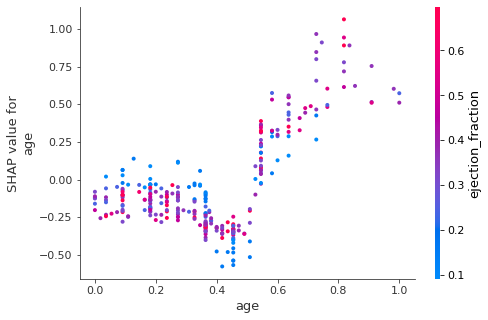

In [467]:
shap.dependence_plot('age', shap_values, features_col)

Create the feature importance plot by calling SHAP’s ‘summary_plot’ function, for each class/label.

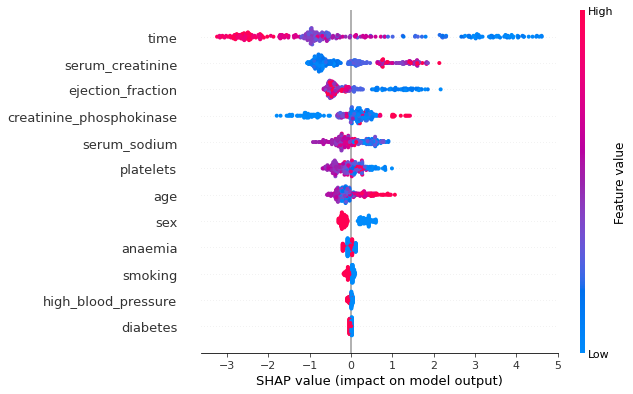

In [469]:
shap_values = explainer.shap_values(features_col)
shap.summary_plot(shap_values, features_col)

# Color — red indicating high and blue indicating low feature value

4) Predict observations, one for positive and one for negative label, by using all four (4) models and indicate which one gives the better prediction.
Provide output for showing the accuracy of each model as follows:
False/True label: 0/1 (or 0/1 depending how you define labels)
* LR: [prob_T prob_F]
* DT: [prob_T prob_F]
* RF: [prob_T prob_F]
* XGB: [prob_T prob_F]

**LR: [prob_T prob_F]**

In [471]:
i = 0
X_observation = X_test.iloc[[i], :]
X_observation

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
43  0.581818      0.0                  0.013269       1.0           0.545455   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
43                  1.0   0.233847           0.05618           0.6  1.0   

    smoking      time  
43      0.0  0.103203

In [473]:
print(f"""\
* True label: {y_test[i]}
* LR: {logreg.predict_proba(X_observation)[0]}
* DT: {decisionTree.predict_proba(X_observation)[0]}
* RF: {random_forest.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation.values)[0]}""")

* True label: 0
* LR: [0.53210169 0.46789831]
* DT: [0. 1.]
* RF: [0.13 0.87]
* XGB: [0.0087536 0.9912464]


In [300]:
j = 3
X_observation = X_test.iloc[[j], :]
X_observation


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6  0.636364      1.0                  0.028451       0.0           0.015152   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
6                  0.0    0.12353          0.078652      0.685714  1.0   

   smoking      time  
6      0.0  0.021352

In [474]:
print(f"""\
* False label: {y_test[j]}
* LR: {logreg.predict_proba(X_observation)[0]}
* DT: {decisionTree.predict_proba(X_observation)[0]}
* RF: {random_forest.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation.values)[0]}""")

* True label: 1
* LR: [0.53210169 0.46789831]
* DT: [0. 1.]
* RF: [0.13 0.87]
* XGB: [0.0087536 0.9912464]


In [480]:
k = 4
X_observation = X_test.iloc[[k], :]
X_observation

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
135  0.636364      0.0                  0.071319       0.0           0.393939   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
135                  0.0   0.288833          0.076404      0.685714  1.0   

     smoking      time  
135      0.0  0.366548

In [481]:
print(f"""\
* False label: {y_test[k]}
* LR: {logreg.predict_proba(X_observation)[0]}
* DT: {decisionTree.predict_proba(X_observation)[0]}
* RF: {random_forest.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation.values)[0]}""")

* False label: 0
* LR: [0.64836437 0.35163563]
* DT: [1. 0.]
* RF: [0.96 0.04]
* XGB: [0.9675882  0.03241183]


**THANK YOU!!**